In [1]:
import seaborn as sns 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import cufflinks as cf
import plotly.express as px
import tensorflow as tf
import os

from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
from sklearn import preprocessing 
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier # Done 
from sklearn.linear_model import LogisticRegression # Done
from sklearn.neighbors import KNeighborsClassifier # Done
from sklearn.tree import DecisionTreeClassifier # Done
from sklearn.svm import SVC # Done
from sklearn.cluster import KMeans # Done

cf.go_offline()
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/aneruthmohanasundaram/Documents/GitHub/Iris-Flower-Analysis/iris.csv')
df.drop('Id',axis=1,inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Visualising the dataset

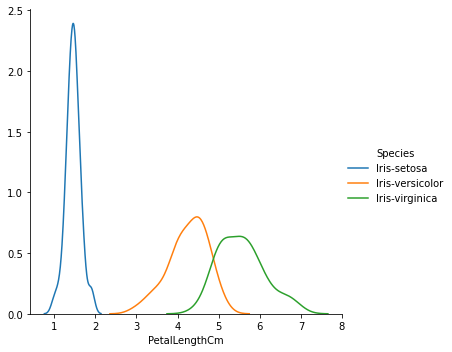

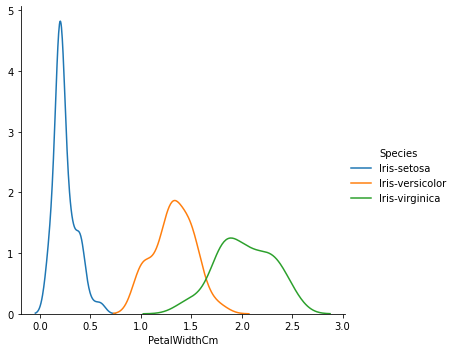

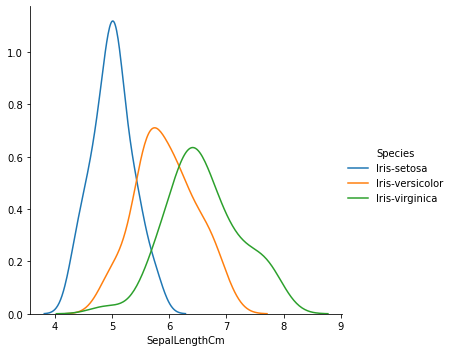

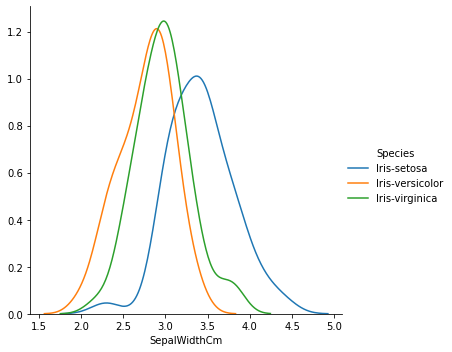

<Figure size 432x288 with 0 Axes>

In [34]:
sns.FacetGrid(df,hue="Species",size=5).map(sns.kdeplot,"PetalLengthCm").add_legend()
sns.FacetGrid(df,hue="Species",size=5).map(sns.kdeplot,"PetalWidthCm").add_legend()
sns.FacetGrid(df,hue="Species",size=5).map(sns.kdeplot,"SepalLengthCm").add_legend()
sns.FacetGrid(df,hue="Species",size=5).map(sns.kdeplot,"SepalWidthCm").add_legend()
plt.show()

my_path = '/Users/aneruthmohanasundaram/Documents/GitHub/Iris-Flower-Analysis/Output'
my_file = 'Visualising the dataset.png'
os.path.join(my_path,my_file)
plt.savefig(os.path.join(my_path,my_file))

In [39]:
df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].iplot(kind='box')

In [42]:
px.violin(df,y="PetalLengthCm",color='Species',points='all')

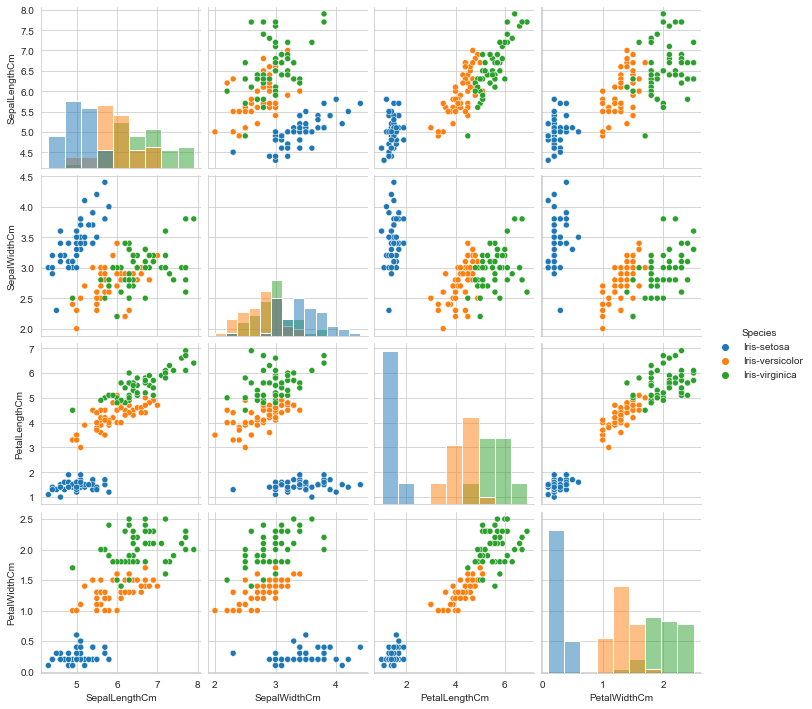

In [43]:
# basic mandatory plotting pair plot 
sns.set_style("whitegrid")
sns.pairplot(df,hue='Species',diag_kind='hist')

# Splitting the data using train test split for our upcomming models
## Basically we split the dataest into two varaible such that in one variable it contains the feature class and in another variable it contains the target variable.

In [3]:
train, test = train_test_split(df, test_size = 0.3)

X_train = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]# taking the training data features
y_train=train.Species# output of our training data
X_test= test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking test data features
y_test =test.Species   #output value of test data

# SVM for Iris Dataset

In [25]:
model = SVC() 
model.fit(X_train,y_train) 
prediction=model.predict(X_test)
print('The accuracy of the SVM is:',((metrics.accuracy_score(prediction,y_test)*100)).round(2),'%')

The accuracy of the SVM is: 91.11 %


# Logistic Regression for Iris Dataset

In [24]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_predict=lr.predict(X_test)
print('The accuracy of the Logistic Regression is:',((metrics.accuracy_score(lr_predict,y_test))*100).round(2),'%')

The accuracy of the Logistic Regression is: 93.33 %


# Random Forest Algorithm and Decision Tree for Iris Dataset

In [32]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_predict=lr.predict(X_test)
print('The accuracy of the Decision Tree Algorithm is:',((metrics.accuracy_score(dt_predict,y_test))*100).round(2),'%')

The accuracy of the Decision Tree Algorithm is: 93.33 %


In [31]:
rf = RandomForestClassifier(n_estimators=100)

rf.fit(X_train,y_train)
rf_predict=rf.predict(X_test)
print('The accuracy of the Random Forest Algorithm is:',((metrics.accuracy_score(rf_predict,y_test))*100).round(2),'%')

The accuracy of the Random Forest Algorithm is: 93.33 %


# Kmeans Algorithm for Iris Dataset

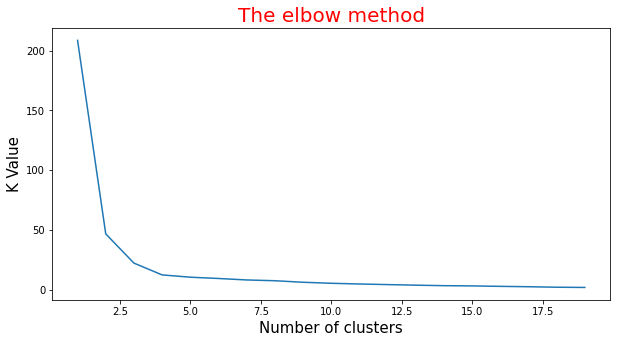

<Figure size 432x288 with 0 Axes>

In [27]:
k_value = []
for i in range(1,20):
    km = KMeans(n_clusters = i, init = 'k-means++')
    km.fit(X_test)
    k_value.append(km.inertia_)

plt.figure(figsize=(10,5))
plt.plot(range(1, 20), k_value)
plt.title('The elbow method',fontsize=20,color='red')
plt.xlabel('Number of clusters',fontsize=15)
plt.ylabel('K Value',fontsize=15)
plt.show()

my_path = '/Users/aneruthmohanasundaram/Documents/GitHub/Iris-Flower-Analysis/Output'
my_file = 'KMeans.png'
os.path.join(my_path,my_file)
plt.savefig(os.path.join(my_path,my_file))

# KNN Algorithm for Iris Dataset

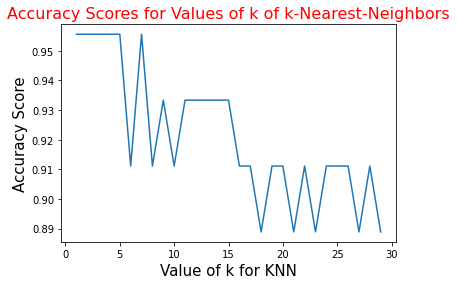

In [26]:
# Predicting the Kmeans 
km = KMeans(n_clusters = 2, init = 'k-means++')
km_predict = km.fit_predict(X_test)
my_path = '/Users/aneruthmohanasundaram/Documents/GitHub/Iris-Flower-Analysis/Output'
my_file = 'KNN.png'
os.path.join(my_path,my_file)

k_range = list(range(1,30))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN',fontsize=15)
plt.ylabel('Accuracy Score',fontsize=15)
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors',fontsize=16,color='red')
plt.savefig(os.path.join(my_path,my_file))

## To check the type of flower present

In [57]:
# The model values can be varied
predict1 = model.predict([(4.4,5.2,2,1)])
print(predict1)
print('\')
predict2 = lr.predict([(5.9,3.0,5.1,1.8)])
print(predict2)

['Iris-setosa']


['Iris-virginica']
